# Word Embeddings

In [29]:
import spacy
import pandas as pd
import collections
import requests
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
#from numpy.linalg import dot
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
nlp = spacy.load('en_core_web_lg')

In [3]:
dublinersUrl = 'https://raw.githubusercontent.com/JonathanReeve/course-computational-literary-analysis/gh-pages/_texts/dubliners.md'
dublinersRaw = requests.get(dublinersUrl).text

In [4]:
dublinersStories = dublinersRaw.split('\n## ')

In [33]:
[story[:20] for story in dublinersStories]

['---\nlayout: narrativ',
 'THE SISTERS\n\nTHERE w',
 'AN ENCOUNTER\n\nIT WAS',
 'ARABY\n\nNORTH RICHMON',
 'EVELINE\n\nSHE sat at ',
 'AFTER THE RACE\n\nTHE ',
 'TWO GALLANTS\n\nTHE gr',
 'THE BOARDING HOUSE\n\n',
 'A LITTLE CLOUD\n\nEIGH',
 'COUNTERPARTS\n\nTHE be',
 'CLAY\n\nTHE matron had',
 'A PAINFUL CASE\n\nMR. ',
 'IVY DAY IN THE COMMI',
 'A MOTHER\n\nMR HOLOHAN',
 'GRACE\n\nTWO GENTLEMEN',
 'THE DEAD\n\nLILY, the ']

In [5]:
dublinersDocs = [nlp(story) for story in dublinersStories]

In [10]:
sisters = dublinersDocs[1]

In [11]:
eveline = dublinersDocs[4]

In [12]:
sisters.similarity(eveline)

0.9923071350200525

In [6]:
africanSwallow = nlp('African swallow')
europeanSwallow = nlp('European swallow')
coconut = nlp('coconut')

In [11]:
result = africanSwallow.vector - europeanSwallow.vector

In [21]:
from numpy.linalg import dot

def mostSimilar(vec):
    highestSimilarities = [0]
    highestWords = [""]
    for w in nlp.vocab:
        sim = similarity(vec, w.vector)
        if sim > highestSimilarities[-1]:
            highestSimilarities.append(sim)
            highestWords.append(w.text.lower())
    return list(zip(highestWords, highestSimilarities))[-10:]

def similarity(vecA, vecB):
    return dot(vecA, vecB) / (norm(vecA, ord=2) * norm(vecB, ord=2))

ImportError: cannot import name 'dot' from 'numpy.linalg' (/nix/store/n09i0lbcyxqdqf00qspj9pdvx8rp72zq-python3-3.7.3-env/lib/python3.7/site-packages/numpy/linalg/__init__.py)

In [19]:
from numpy.linalg import dot

def mostSimilar(vec):
    highestSimilarities = [0]
    highestWords = [""]
    for w in nlp.vocab:
        sim = similarity(vec, w.vector)
        if sim > highestSimilarities[-1]:
            highestSimilarities.append(sim)
            highestWords.append(w.text.lower())
    return list(zip(highestWords, highestSimilarities))[-10:]

def similarity(vecA, vecB):
    return dot(vecA, vecB) / (norm(vecA, ord=2) * norm(vecB, ord=2))

NameError: name 'dot' is not defined

In [14]:
africanSwallow.similarity(europeanSwallow)

0.8596378859289445

In [15]:
africanSwallow.similarity(coconut)

0.2901231866716321

In [79]:
def sim(a, b): 
    print('Similarity for "{}" and "{}": {}'.format(a, b, 100*nlp(a).similarity(nlp(b))))

In [82]:
for pair in [('chalkboard', 'whiteboard'), ('sweater', 'jacket'), 
             ('jacket', 'coat'), ('jacket', 'orange'), ('apple', 'orange')]: 
    sim(*pair)

Similarity for "chalkboard" and "whiteboard": 64.95808524174481
Similarity for "sweater" and "jacket": 71.7049606529978
Similarity for "jacket" and "coat": 68.19553856503015
Similarity for "jacket" and "orange": 37.24082729572181
Similarity for "apple" and "orange": 56.189175387042134


In [32]:
labels = [story[:story.find('\n')] for story in dublinersStories]

In [61]:
labels += ['boy', 'woman', 'man', 'priest', 'marriage']

In [63]:
wordsDocs = [nlp(doc) for doc in ['boy', 'woman', 'man', 'priest', 'marriage']]

In [66]:
dublinersDocs += wordsDocs

In [30]:
# labels = labels[1:]
# dublinersStories = dublinersStories[1:]
# dublinersDocs = dublinersDocs[1:]

In [24]:
pca = PCA(n_components=2)

In [25]:
pcaOut = pca.fit_transform([story.vector for story in dublinersDocs])

In [26]:
df = pd.DataFrame(pcaOut)

In [30]:
%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,8)

def plotResults3D(df, labels): 
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(df[0], df[1], df[2], marker='o')
    for i, label in enumerate(labels):
        ax.text(df.loc[i][0], df.loc[i][1], df.loc[i][2], label)

In [33]:
plotResults3D(df, labels)

<IPython.core.display.Javascript object>

ValueError: Unknown projection '3d'

In [84]:
tsne = TSNE()

In [69]:
pcaOut.shape

(21, 2)

In [85]:
tsneOut = tsne.fit_transform([story.vector for story in dublinersDocs])

In [86]:
tsneOut.shape

(21, 2)

In [87]:
df = pd.DataFrame(tsneOut, index=labels, columns=['C1', 'C2'])

In [88]:
df = df.iloc[1:]

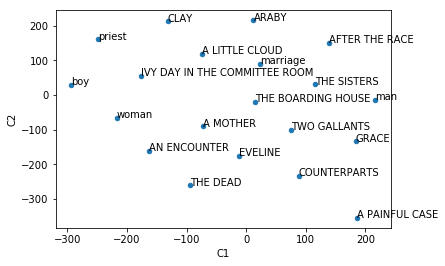

In [89]:
ax = df.plot(kind='scatter', x='C1', y='C2')
for key, val in df.iterrows(): 
    ax.annotate(key, val)

In [75]:
dublinersDocs[4].similarity(nlp('boy'))

0.5609848014700407

In [76]:
dublinersDocs[4].similarity(nlp('woman'))

0.5929788802704437